In [2]:
import dotenv
import os 
from pathlib import Path

project_dir = Path('..').resolve()
dotenv_path = project_dir / '.env'
dotenv.load_dotenv(dotenv_path)

True

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

videos = list(Path(os.environ['MFE_RAW_VIDEOS']).glob('*.mp4'))
videos = list(filter(lambda x: not x.parts[-1].startswith('.'), videos)) # filter out videos that start with .
print(len(videos))

345


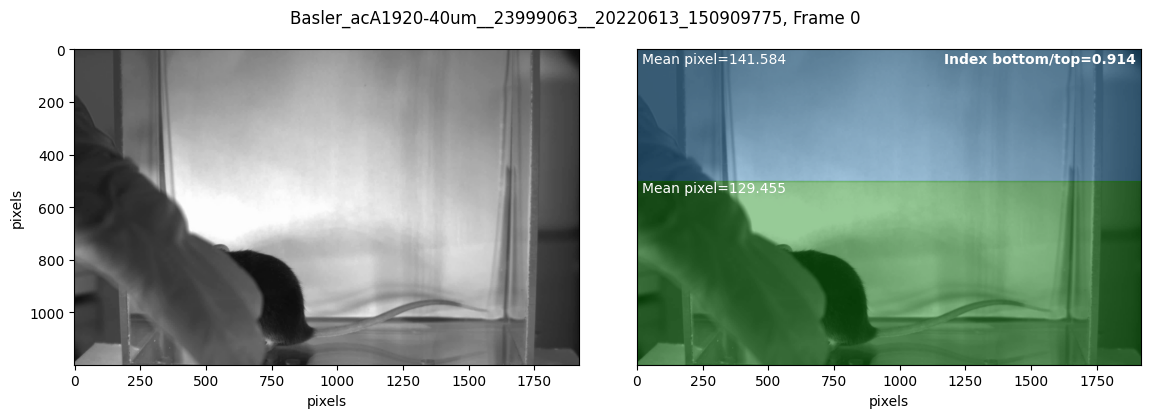

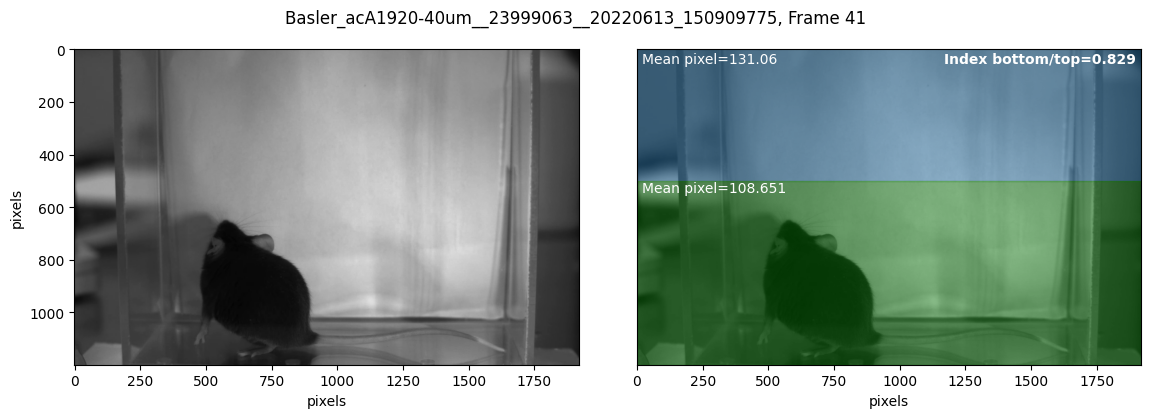

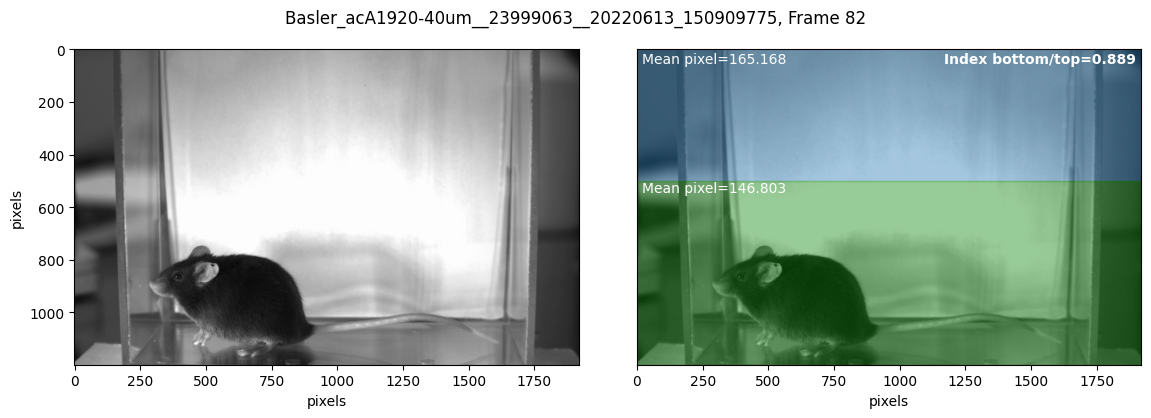

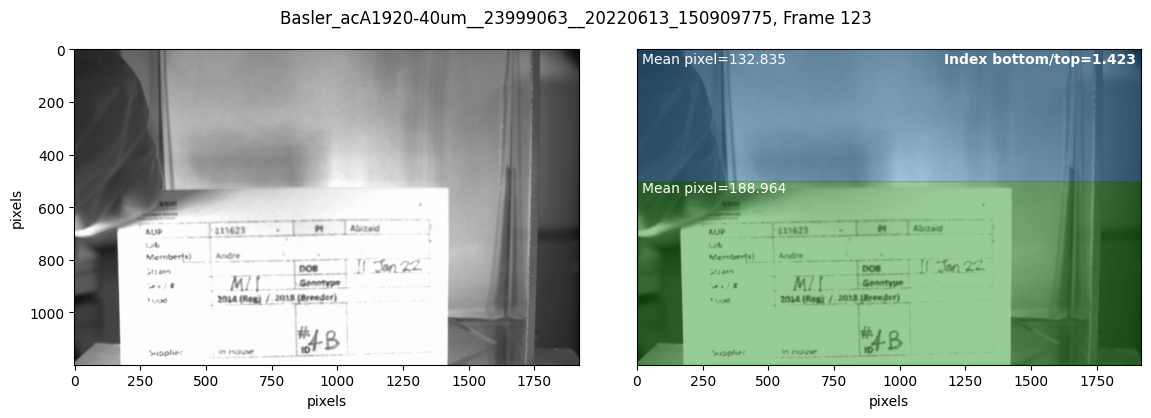

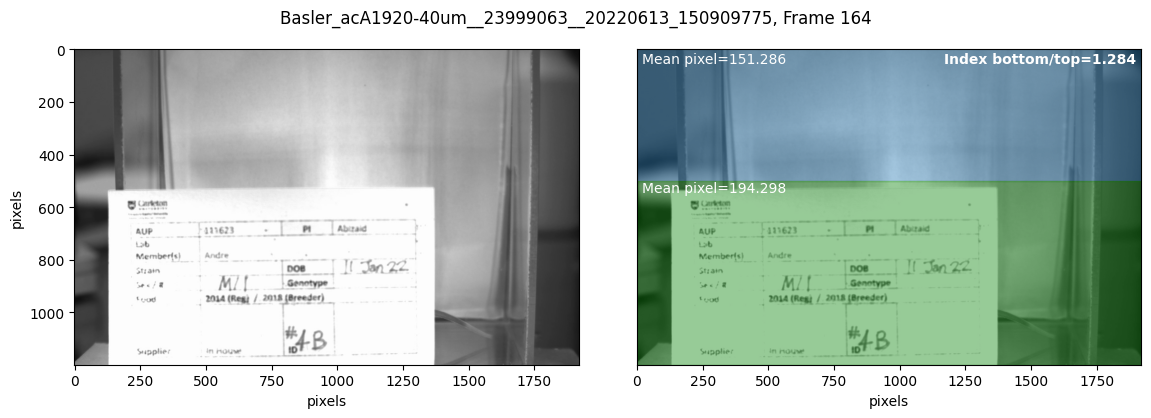

In [4]:
output_folder = project_dir / 'reports/figures/lazy_card_detection'
if not output_folder.exists():
    output_folder.mkdir(parents=True)

frames = 5

for video in videos:
    cap = cv2.VideoCapture(str(video))
    fps = float(cap.get(cv2.CAP_PROP_FPS))
    for i in range(frames):
        frame_idx = int(i*fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        h, w, c = frame.shape

        separation = 500
        bottom_half = round(frame[separation:].mean(), 3)
        top_half = round(frame[:separation].mean(), 3)
        index_bottom_over_top = round(bottom_half / top_half, 3)

        gs = plt.GridSpec(1, 2)
        plt.figure(figsize=(12, 4))
        plt.subplot(gs[0])
        plt.imshow(frame)
        plt.xlabel('pixels')
        plt.ylabel('pixels')

        ax = plt.subplot(gs[1])
        plt.imshow(frame)
        plt.xlabel('pixels')
        plt.ylabel('pixels')

        plt.text(.01, .99, f'Mean pixel={top_half}', ha='left', va='top', transform=ax.transAxes, fontdict={'color': 'white'})
        plt.text(.01, 1-separation/h, f'Mean pixel={bottom_half}', ha='left', va='top', transform=ax.transAxes, fontdict={'color': 'white'})
        plt.text(.99, .99, f'Index bottom/top={index_bottom_over_top}', ha='right', va='top', transform=ax.transAxes, fontdict={'color': 'white', 'weight': '1000'})
    
        top_half = plt.Polygon([
            [0, 0],
            [w, 0],
            [w, separation],
            [0, separation]
        ], alpha=0.4)
        ax.add_patch(top_half)

        bottom_half = plt.Polygon([
            [0, separation],
            [w, separation],
            [w, h],
            [0, h]
        ], alpha=0.4, color='green')
        ax.add_patch(bottom_half)
        ax.yaxis.set_visible(False)

        fname, ext = video.parts[-1].split('.')

        plt.suptitle(f"{fname}, Frame {frame_idx}")
        plt.tight_layout()
        plt.savefig(output_folder / f"{fname}_frame{frame_idx:05}.png")
        plt.show()    
        
    break

In [5]:
output_folder = project_dir / 'reports/interim/lazy_cards'
if not output_folder.exists():
    output_folder.mkdir(parents=True)

frames = 60

for video in tqdm(videos):
    try: 
        fname, ext = video.parts[-1].split('.')
        cap = cv2.VideoCapture(str(video))
        fps = float(cap.get(cv2.CAP_PROP_FPS))
        
        best_frame = None
        best_index_bottom_over_top = None
        
        for i in np.arange(frames):
            frame_idx = int(i*fps)
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            separation = 500
            bottom_half = round(frame[separation:].mean(), 3)
            top_half = round(frame[:separation].mean(), 3)
            index_bottom_over_top = round(bottom_half / top_half, 3)
            # if bottom_half > 150 and bottom_half < 170 and index_bottom_over_top > 1:
            #     plt.imshow(frame)
            #     plt.show()

            if best_frame is None or index_bottom_over_top > best_index_bottom_over_top and bottom_half < 170:
                best_frame = frame_idx 
                best_index_bottom_over_top = index_bottom_over_top

        cap.set(cv2.CAP_PROP_POS_FRAMES, best_frame)
        ret, frame = cap.read()
        plt.imsave(output_folder / f"{fname}.png", frame)
        # plt.imshow(frame)
        # plt.show()
    except:
        print("error on video", video)


  0%|          | 0/345 [00:00<?, ?it/s]

  7%|▋         | 23/345 [00:52<09:32,  1.78s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20220614_103944829.mp4


  8%|▊         | 29/345 [01:03<07:45,  1.47s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20220613_104234600.mp4


 11%|█▏        | 39/345 [01:24<07:02,  1.38s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20220614_133927187.mp4


 32%|███▏      | 110/345 [03:03<04:23,  1.12s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230209_104122200.mp4


 40%|████      | 138/345 [03:41<03:27,  1.00s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230210_102748386.mp4


 46%|████▌     | 158/345 [04:09<03:35,  1.15s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230210_165011823.mp4


 49%|████▉     | 170/345 [04:26<03:43,  1.28s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230302_110525013.mp4


 63%|██████▎   | 216/345 [06:10<10:40,  4.97s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230307_152412726.mp4


 70%|███████   | 242/345 [06:57<03:23,  1.98s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230308_143440809.mp4
error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230308_143607909.mp4


 72%|███████▏  | 250/345 [07:05<01:36,  1.02s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_104335272.mp4


 73%|███████▎  | 253/345 [07:07<00:57,  1.61it/s]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_105203407.mp4
error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_105232375.mp4


 74%|███████▍  | 255/345 [07:15<03:44,  2.49s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_105607698.mp4


 75%|███████▌  | 259/345 [07:39<07:44,  5.40s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_112802129.mp4


 75%|███████▌  | 260/345 [07:43<07:10,  5.06s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_112825263.mp4


 78%|███████▊  | 270/345 [08:26<07:06,  5.69s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230309_134444539.mp4


 88%|████████▊ | 302/345 [09:09<00:45,  1.06s/it]

error on video /Volumes/LAB-DRIVE/telfer-thesis/raw-unsorted/undone/Basler_acA1920-40um__23999063__20230324_115030028.mp4


100%|██████████| 345/345 [10:57<00:00,  1.91s/it]
